# Project:Electric Motor
For this project I chose a dataset about an electric motor for cars, which is available on Kaggle. The dataset comprises several sensor data collected from a permanent magnet synchronous motor (PMSM) deployed on a test bench. The most interesting target features are rotor temperature ("pm"), stator temperatures ("stator_*") and torque. Especially rotor temperature and torque are not reliably and economically measurable in a commercial vehicle but they are crucial for an efficient drivetrain. It is therefore of interest for car companies to be able to derive those parameters from other parameters, which are easy to measure. In return this reduces costs. 

Since rotor temperature and torque are very important parameters for efficiency and are difficult to measure in a vehicle, I therefore am intersted in the following questions:
<ol>
  <li>What are the correlations between different parameters of an electric motor (the individual columns)? Espescially between rotor temperature and torque with the other features. Are there some features, that are not important at all?</li>
  <li>Can I create a linear regression model to explain rotor temperature and torque as a linear combination of features?</li>
    <li>Can I combine different runs (different profile_id) and create a better result?</li>
</ol>

First, start with loading the packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

%matplotlib inline

Next, load read in the csv file. It can be downloaded here: https://www.kaggle.com/wkirgsn/electric-motor-temperature/downloads/electric-motor-temperature.zip/2

In [6]:
df = pd.read_csv('/home/matthias/SynologyDrive/Data_Science_Nanodegree/01_Introduction-Data-Science/03_project/pmsm_temperature_data.csv')
df.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4


In [7]:
df.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
count,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000
mean,-0.003905,0.004723,0.004780,-0.005690,-0.006336,-0.003333,0.006043,-0.003194,-0.004396,0.000609,-0.002208,-0.003935,50.732001
std,0.993127,1.002423,0.997878,1.002330,1.001229,0.997907,0.998994,0.997912,0.995686,1.001049,0.999597,0.998343,22.073125
min,-8.573954,-1.429349,-1.655373,-1.861463,-1.371529,-3.345953,-3.245874,-3.341639,-2.631991,-1.834688,-2.066143,-2.019973,4.000000
25%,-0.599385,-1.037925,-0.826359,-0.927390,-0.951892,-0.266917,-0.756296,-0.257269,-0.672308,-0.747265,-0.761951,-0.725622,32.000000
50%,0.266157,-0.177187,0.267542,-0.099818,-0.140246,-0.187246,0.213935,-0.190076,0.094367,-0.057226,0.005085,0.006536,56.000000
75%,0.686675,0.650709,0.358491,0.852625,0.853584,0.547171,1.013975,0.499260,0.680691,0.697344,0.772239,0.725660,68.000000
max,2.967117,2.649032,2.274734,1.793498,2.024164,3.016971,1.060937,2.914185,2.917456,2.449158,2.326668,2.653781,81.000000


What is visible from this first glance:
<ol>
  <li>There seem to be no missing values</li>
  <li>The standart deviation for all the sensors is close to 1. It seems the features in the dataset were scaled such that the mean is zero and std is 1. This also means that they don't have standard units like degree Celcius.</li>
  <li>This in return leads to the conclusion that absolute values are not important at all.</li>
</ol>

In [8]:
df.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

There are only numerical values, no categorical ones. I did not choose this dataset to not have missing values or no categorical values. I just liked the topic. I hope this is fine.

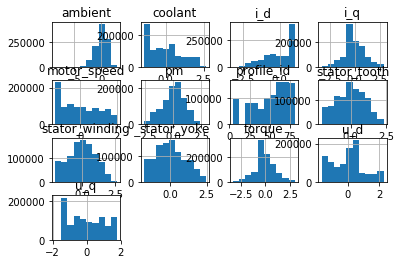

In [9]:
df.hist();

In [10]:
df.shape

(998070, 13)

In [11]:
profile_id_list=df.profile_id.unique()
profile_id_list, df.profile_id.unique().shape

(array([ 4,  6, 10, 11, 20, 27, 29, 30, 31, 32, 36, 41, 42, 43, 44, 45, 46,
        47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
        64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81,
        72]), (52,))

There are 52 unique profile_ID values. Each ID value is a different run with different mappings. In the documentation is stated:"Each measurement session has a unique ID. Make sure not to try to estimate from one session onto the other as they are strongly independent." So I have to be carefull when comparing different runs (different profile_ID)

#### Are there missing values?

In [12]:
np.sum(np.sum(df.isnull()))

0

No, there are no missing values. This makes life a lot easier.

### Question 1: What are the correlations between the individual columns? Espescially between rotor temperature and torque with the other features. Are there some features, that are not important at all?

To check for correlations I create a correlation matrix. Note that pm, stator_yoke, stator_tooth, stator_winding and torque are target values. Also, pm, stator_yoke, stator_tooth and stator_winding are all temperatures. So it is very likely that they correlate with each other.

Also important is the fact to not unintentionally mix data with different profile_ID values

First, create a correlation matrix for three random profile_ID values

In [13]:
# choose three random profile_ID values
random.seed(42) # make it reproducible
id_rnd=random.choices(profile_id_list,k=3)
id_rnd

[63, 6, 44]

In [14]:
#create three datasets with unique ID values
df_a=df[df.profile_id==id_rnd[0]]

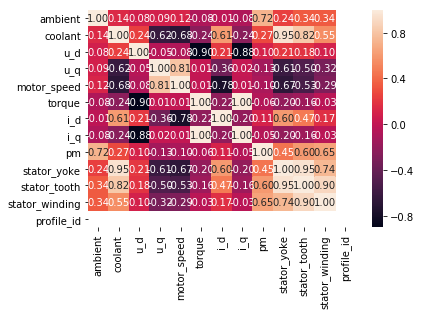

In [15]:
sns.heatmap(df_a.corr(), annot=True, fmt=".2f");

In [16]:
#create three datasets with unique ID values
df_b=df[df.profile_id==id_rnd[1]]

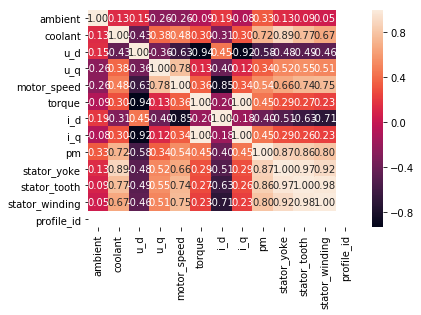

In [17]:
sns.heatmap(df_b.corr(), annot=True, fmt=".2f");

In [18]:
#create three datasets with unique ID values
df_c=df[df.profile_id==id_rnd[2]]

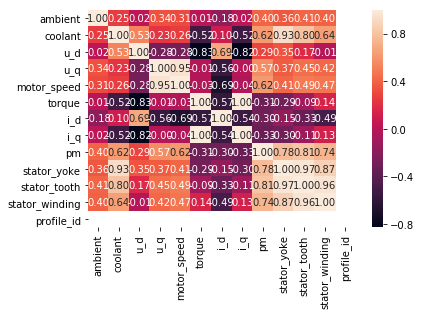

In [19]:
sns.heatmap(df_c.corr(), annot=True, fmt=".2f");

All three correlation matrices are in parts equal. They all have the following in common
<ol>
  <li>i_q seems to be the same thing as torque, while u_d is anti-correlated with torque. </li>
  <li>u_q is not correlated at all with torque, so u_d and u_q are totally different things. The same is true for i_d and i_q </li>
  <li> rotor temperature pm is often correlated with all other features, but the correlation between pm and torque changes</li>
  <li>All target temperatures pm and all stator temperatures are highly correlated.</li>
  <li>u_q is correlated with motor speed.</li>
  <li>I don't see a feature that is not important</li>
</ol>

Next I want to check roughly if it is possible to mix data for different runs (different value_ID) - more in question 3. For this I create the correlation matrix of df and check if the findings of before are still valid.

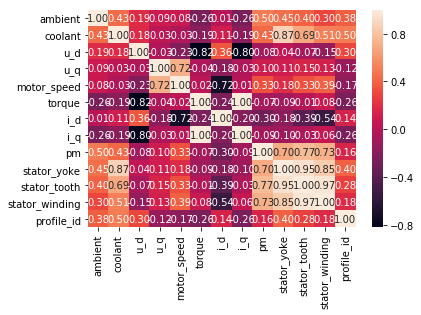

In [20]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

It seems my findings of before are still valid, but details like a variable correlation between torque and pm are of course not visible.

### Question 2: Can I create a linear regression model to explain rotor temperature and torque as a linear combination of features

First, define explanatory and response variable. As stated before, I am interested to explain rotor temperature pm and torque by the other features. From all those variables I remove all stator temperatures, because they are highly correlated with pm and they are difficult to measure as well. Therefore a model based on parameters that are hard to measure does not make sense. I keep profile_id in all of them to be able to select by profile_id.

In [21]:
X = df.drop(['pm','stator_yoke','stator_winding','stator_tooth','torque'], axis=1)
y_pm = df[['pm','profile_id']]
y_torque = df[['torque','profile_id']]

In [22]:
X4 = X[X.profile_id==4]
X4 = X4.drop(['profile_id'],axis=1)
X4.head()

,ambient,coolant,u_d,u_q,motor_speed,i_d,i_q
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,1.029572,-0.245860
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,1.029509,-0.245832
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,1.029448,-0.245818
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,1.032845,-0.246955
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,1.031807,-0.246610


In [23]:
y4_pm = y_pm[y_pm.profile_id==4]['pm']
y4_torque = y_torque[y_torque.profile_id==4]
y4_torque.head()

,torque,profile_id
0,-0.250182,4
1,-0.249133,4
2,-0.249431,4
3,-0.248636,4
4,-0.248701,4


In [24]:
# select a single run
X4 = X[X.profile_id==4]
X4 = X4.drop(['profile_id'],axis=1)
y4_pm = y_pm[y_pm.profile_id==4]['pm']
y4_torque = y_torque[y_torque.profile_id==4]

In [25]:
# Function for linear regression
def lin_reg(X,y,test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit
    y_pred = lm_model.predict(X_test) #Predict
    r2 = r2_score(y_test,y_pred) #Score
    return r2, lm_model

In [26]:
# Linear regression first for rotor temperature pm
r2_4_pm,lm_model=lin_reg(X4,y4_pm,0.15)
r2_4_pm

0.5785389875035487

This is quite good. The features explain about 58% of the variability of rotor temperature.

Lets take a look at the coefficients. Since they were all scaled they directly tell influence each feature has on rotor temperature.

In [27]:
def bar_plot(lm_model_coef,X):
    serie=pd.Series(lm_model_coef,index=X4.columns)
    serie.sort_values(ascending=False, inplace=True)
    plt.bar(serie.index,serie);
    return serie

coolant        1.703497
motor_speed    0.448211
i_d            0.067113
ambient       -0.099455
u_q           -0.315121
i_q           -0.796140
u_d           -1.100356
dtype: float64

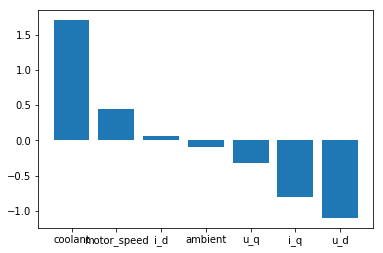

In [28]:
bar_plot(lm_model.coef_,X4)

#### Discussion
The variance of rotor temperature pm can be explained by 57.9% by the featues given. This is quite high given the simplicity of the model. Mostly 5 features contribute to the r2 score and with those five features (dropped i_d and ambient) we still get an r2 score of 57.8%. Those features are coolant temperature, motor speed, voltages u_q and u_d and current i_q. All of them seem easy to be measured, because they can be measured outside the engine. But because of the simplicity of the model those features explain just roughly the target value rotor temperature.

In [29]:
# Dropping more features.
X4_red = X4.drop(['i_d','ambient'], axis=1)
r2_4_pm,lm_model=lin_reg(X4_red,y4_pm,0.15)
r2_4_pm, X4_red.columns

(0.5778051911055655,
 Index(['coolant', 'u_d', 'u_q', 'motor_speed', 'i_q'], dtype='object'))

### ____________________________________________________________________________________________
Now to torque

In [30]:
# Linear regression for torque
r2_4_torque,lm_model=lin_reg(X4,y4_torque,0.15)
r2_4_torque

0.9996263139373952

This is incredibly high and it is most likely due to i_q, since the correlation matrix showed a strong correlation between torque and i_q

i_q            0.802266
coolant        0.103390
u_q            0.062512
ambient       -0.060140
u_d           -0.060408
motor_speed   -0.225351
i_d           -0.248603
dtype: float64

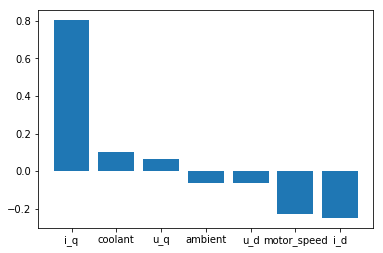

In [31]:
bar_plot(lm_model.coef_[0],X4)

#### Discussion
For torque the feature i_q is by far the most significant feature. All explanatory features together explain 99.96% of the torque variance. But when having just i_q as explanatory variable the r2 score is 0.9966. So torque is easy. Just measure the current i_q and you are fine.

In [32]:
# just use i_q as explanatory variable
X4_red = X4.drop(['coolant','u_q','ambient','u_d','motor_speed','i_d'],axis=1) #X4_red = X4['i_q'] gives reshape errors I can not get rid of
r2_4_torque,lm_model=lin_reg(X4_red,y4_torque,0.15)
r2_4_torque

0.9965633394671424

### Question 3: Can I combine different runs (different profile_id) and create a better result?
For this I will do the same linear regression, but with the whole dataset with different profile_id values. For rotor temperature pm I will only use the five mentioned features in part 2. For torque the case is different. There I just use i_q as explanatory variable and I can only check if the result gets worse, since it was 99.66% earlier

In [33]:
X_pm = df.drop(['pm','stator_yoke','stator_winding','stator_tooth','torque','profile_id','i_d','ambient'], axis=1)
y_pm = df[['pm','profile_id']]
X_torque = df[['i_q']]
y_torque = df[['torque']]

In [34]:
# linear regression for rotor temperature
r2_pm,lm_model=lin_reg(X_pm,y_pm,0.15)
r2_pm

0.3402175662125588

In [35]:
# linear regression for torque
r2_torque,lm_model=lin_reg(X_torque,y_torque,0.15)
r2_torque

0.9931712586569923

### Conclusion
#### Rotor temperature 
The r2 score for rotor temperature pm dropped from 58% to just 34% when taking all the data of all the runs together. So the warning not to mix runs was definitely helpful.
#### Torque
For torque I just used i_q and also the r2 score for torque dropped from 99.66% to 99.32% when taking all the data of all the runs. So also here it was harmful to mix runs (different profile_id).